In [16]:
pip install ipython-sql

  Obtaining dependency information for ipython-sql from https://files.pythonhosted.org/packages/30/8f/9e50fa53ffc371483f9d1b90c1175b706d28a2e978e90a8894035af01905/ipython_sql-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for prettytable from https://files.pythonhosted.org/packages/d9/5a/bfdc26c0e19156992b1dc9de47f0b2e8992fe43db9981d814f860bdce2b3/prettytable-3.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for sqlalchemy>=2.0 from https://files.pythonhosted.org/packages/ca/90/cad45fb5b983048628047885b0981e1a482473fc24996ede638469f2c692/SQLAlchemy-2.0.34-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for sqlparse from https://files.pythonhosted.org/packages/5d/a5/b2860373aa8de1e626b2bdfdd6df4355f0565b47e51f7d0c54fe70faf8fe/sqlparse-0.5.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 5.9 MB/s eta

In [4]:
import sqlite3
from pathlib import Path
import pandas as pd

In [6]:
Path("student_grades.db").touch()

conn = sqlite3.connect("student_grades.db")
c = conn.cursor()

In [45]:
c.execute(
    """CREATE TABLE IF NOT EXISTS students (
    student_id INT PRIMARY KEY AUTOINCREMENT, first_name TEXT, last_name TEXT);"""
)

In [46]:
c.execute("DROP TABLE IF EXISTS grades;")

In [47]:
c.execute(
    """CREATE TABLE IF NOT EXISTS grades (
    grade_id INT PRIMARY KEY AUTOINCREMENT, student_id INT, subject TEXT, grade INT, FOREIGN KEY (student_id) REFERENCES students(student_id)
    );"""
 )

In [48]:
c.execute(
    """INSERT INTO students (student_id, first_name, last_name) 
    VALUES (1, "Alice", "Johnson"), (2, "Bob", "Smith"), (3, "Carol", "White"), (4, "David", "Brown"), (5, "Eve", "Davis")
    """)

In [49]:
c.execute(
    """INSERT INTO grades (grade_id, student_id, subject, grade) 
    VALUES (1, 1, "Math", 95), (2, 1, "English", 88), (3, 1, "History", 90),
    (4, 2, "Math", 82), (5, 2, "English", 76), (6, 2, "History", 85),
    (7, 3, "Math", 90), (8, 3, "English", 91), (9, 3, "History", 70),
    (10, 4, "Math", 65), (11, 4, "English", 80), (12, 4, "History", 98), 
    (13, 5, "Math", 89), (14, 5, "English", 94), (15, 5, "History", 90)
    ;""")

In [50]:
conn.commit()

In [51]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [52]:
%sql sqlite:///student_grades.db

In [53]:
%%sql 

UsageError: %%sql is a cell magic, but the cell body is empty. Did you mean the line magic %sql (single %)?


In [62]:
%%sql 
SELECT s.first_name, s.last_name, g.grade FROM students s
LEFT JOIN grades g ON s.student_id = g.student_id;

 * sqlite:///student_grades.db
Done.


first_name,last_name,grade
Alice,Johnson,88
Alice,Johnson,90
Alice,Johnson,95
Bob,Smith,76
Bob,Smith,82
Bob,Smith,85
Carol,White,70
Carol,White,90
Carol,White,91
David,Brown,65


In [65]:
%%sql
SELECT AVG(grade) as average_grade, s.first_name, s.last_name
FROM students s 
LEFT JOIN grades g ON s.student_id = g.student_id
GROUP BY grade;

 * sqlite:///student_grades.db
Done.


average_grade,first_name,last_name
65.0,David,Brown
70.0,Carol,White
76.0,Bob,Smith
80.0,David,Brown
82.0,Bob,Smith
85.0,Bob,Smith
88.0,Alice,Johnson
89.0,Eve,Davis
90.0,Alice,Johnson
91.0,Carol,White


In [70]:
%%sql
SELECT AVG(grade) as average_grade, s.first_name, s.last_name
FROM students s 
LEFT JOIN grades g ON s.student_id = g.student_id
GROUP BY grade
ORDER BY average_grade DESC LIMIT 1;

 * sqlite:///student_grades.db
Done.


average_grade,first_name,last_name
98.0,David,Brown


In [71]:
%%sql
SELECT AVG(grade) as math_average
FROM grades g
WHERE subject = "Math";

 * sqlite:///student_grades.db
Done.


math_average
84.2


In [80]:
%%sql
SELECT DISTINCT s.first_name, s.last_name 
FROM students s
LEFT JOIN grades g ON s.student_id = g.student_id
WHERE grade > 90;

 * sqlite:///student_grades.db
Done.


first_name,last_name
Alice,Johnson
Carol,White
David,Brown
Eve,Davis


In [82]:
#Use Pandas to load the data from the students and grades tables into DataFrames
data = %sql SELECT student_id, first_name, last_name FROM students

# Converting result of the query to the pandas DataFrame
students_df = data.DataFrame()

 * sqlite:///student_grades.db
Done.


In [85]:
#converting grades table into DataFrame
data1 = %sql SELECT grade_id, student_id, subject, grade FROM grades
grades_df = data1.DataFrame()

 * sqlite:///student_grades.db
Done.


In [108]:
students_df.head()
#concat the first name and last name column
students_df['full_name'] = students_df['first_name'] + " " + students_df['last_name']
students_df.head()

,student_id,first_name,last_name,full_name
0,1,Alice,Johnson,Alice Johnson
1,2,Bob,Smith,Bob Smith
2,3,Carol,White,Carol White
3,4,David,Brown,David Brown
4,5,Eve,Davis,Eve Davis


In [86]:
grades_df.head()

,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76


In [112]:
df = pd.merge(students_df, grades_df, on = 'student_id')
df.head()

,student_id,first_name,last_name,full_name,grade_id,subject,grade
0,1,Alice,Johnson,Alice Johnson,1,Math,95
1,1,Alice,Johnson,Alice Johnson,2,English,88
2,1,Alice,Johnson,Alice Johnson,3,History,90
3,1,Alice,Johnson,Alice Johnson,1,Math,95
4,1,Alice,Johnson,Alice Johnson,2,English,88


Text(0.5, 1.0, 'Average Grade for Each Student')

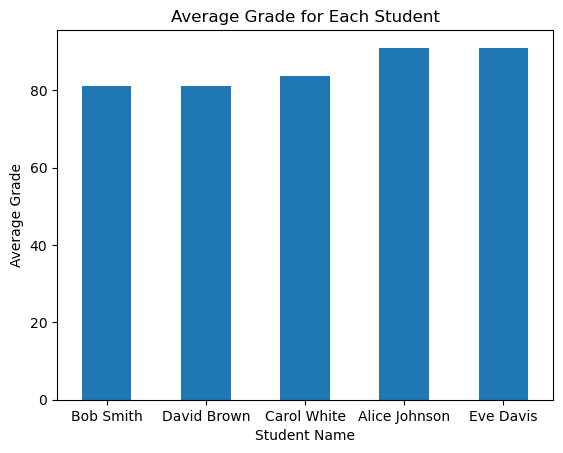

In [140]:
#plot the average grade for each student
import matplotlib.pyplot as plt
#calculate the avg and sort by name
avg = df.groupby('full_name')['grade'].mean().sort_values()
avg.plot(kind = "bar")
plt.xlabel("Student Name")
plt.xticks(rotation = 0)
plt.ylabel("Average Grade")
plt.title("Average Grade for Each Student")

Text(0.5, 1.0, 'Average Grade for Each Subject')

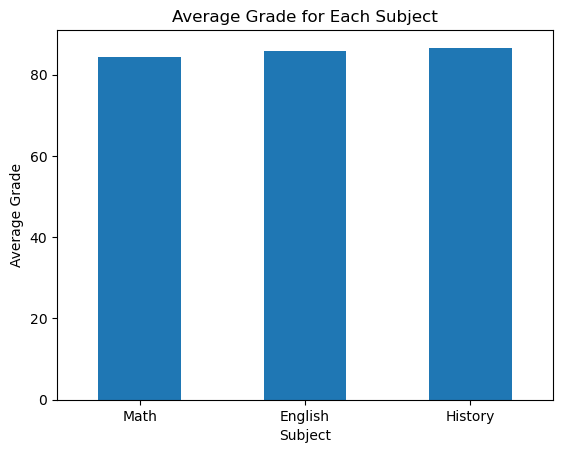

In [143]:
#Create a bar chart showing the average grade for each subject.
subject = df.groupby('subject')['grade'].mean().sort_values()
subject.plot(kind = "bar")
plt.xlabel("Subject")
plt.xticks(rotation = 0)
plt.ylabel("Average Grade")
plt.title("Average Grade for Each Subject")

In [144]:
#bonus: implement a query that finds the students with the highest grade in each subject
#visualize the results using a grouped bar chart

In [178]:
highest_grade = df.groupby('subject')['grade'].max().sort_values()
student_name = pd.merge(highest_grade, df, on = ['subject', 'grade'])
student_name
#Eve has the best grade in English, David has the best grade in History, Alice has the best grade in Math

,subject,grade,student_id,first_name,last_name,full_name,grade_id
0,English,94,5,Eve,Davis,Eve Davis,14
1,English,94,5,Eve,Davis,Eve Davis,14
2,English,94,5,Eve,Davis,Eve Davis,14
3,Math,95,1,Alice,Johnson,Alice Johnson,1
4,Math,95,1,Alice,Johnson,Alice Johnson,1
5,Math,95,1,Alice,Johnson,Alice Johnson,1
6,History,98,4,David,Brown,David Brown,12
7,History,98,4,David,Brown,David Brown,12
8,History,98,4,David,Brown,David Brown,12


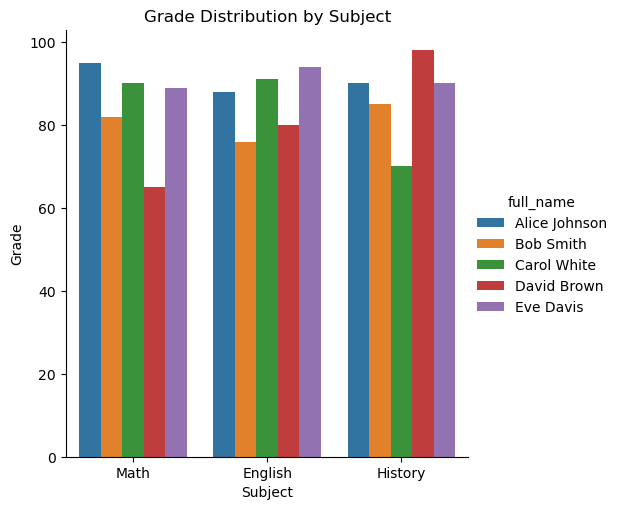

In [195]:
#grouped bar chart
import seaborn as sns
sns.catplot(
    data=df,
    kind="bar",
    x="subject",
    y="grade",
    hue="full_name",
    legend=True
).set(title = "Grade Distribution by Subject", xlabel = "Subject", ylabel = "Grade")